<a href="https://colab.research.google.com/github/Aswinibishoyi/3.Data-Preprocessing/blob/master/AdaBoost_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AdaBoost Ensemble

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


AdaBoost Scikit-Learn API

AdaBoost for Classification

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds

In [3]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)


results may vary given the stochastic nature of the learning algorithm, if you repeate run couple of time

Use the AdaBoost model as a final model and make predictions for classification.
First, the AdaBoost ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.
below demonstrates this on our binary classification dataset

In [4]:
# make predictions using adaboost for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


*AdaBoost for Regression*
First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 20 input features

In [5]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


1. we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds.
2. We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0

1. Running the example reports the mean and standard deviation accuracy of the model.
2. we can see the AdaBoost ensemble with default hyperparameters achieves a MAE of about 100.

In [6]:
# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -72.387 (4.360)


use the AdaBoost model as a final model and make predictions for regression

In [7]:
# adaboost ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,-1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,-1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -26


# AdaBoost **Hyperparameters**

# Explore Number of Trees

An important hyperparameter for AdaBoost algorithm is the number of decision trees used in the ensemble.
Each decision tree used in the ensemble is designed to be a weak learner. 
That is, it has skill over random prediction, but is not highly skillful. If one-level decision trees are used, they are called decision stumps.
The number of trees added to the model must be high for the model to work well, often hundreds, if not thousands.
The number of trees can be set via the “n_estimators” argument and defaults to 50.
The example below explores the effect of the number of trees with values between 10 to 5,000.

we can see that that performance improves on this dataset until about 50 trees and declines after that. This might be a sign of the ensemble overfitting the training dataset after additional trees are added

>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)
>1000 0.791 (0.032)
>5000 0.783 (0.031)


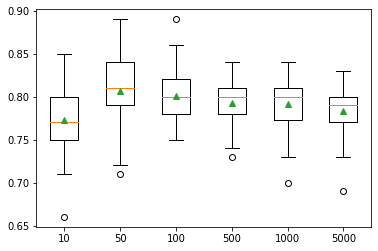

In [8]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = AdaBoostClassifier(n_estimators=10)
	models['50'] = AdaBoostClassifier(n_estimators=50)
	models['100'] = AdaBoostClassifier(n_estimators=100)
	models['500'] = AdaBoostClassifier(n_estimators=500)
	models['1000'] = AdaBoostClassifier(n_estimators=1000)
	models['5000'] = AdaBoostClassifier(n_estimators=5000)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Explore Weak Learner

A decision tree with one level is used as the weak learner by default.

We can make the models used in the ensemble less weak (more skillful) by increasing the depth of the decision tree.

The example below explores the effect of increasing the depth of the DecisionTreeClassifier weak learner on the AdBoost ensemble.

Running the example first reports the mean accuracy for each configured weak learner tree depth.

In this case, we can see that as the depth of the decision trees is increased, the performance of the ensemble is also increased on this dataset.

Result

whisker plot is created for the distribution of accuracy scores for each configured weak learner depth.

We can see the general trend of model performance and weak learner depth.

>1 0.806 (0.041)
>2 0.863 (0.028)
>3 0.869 (0.031)
>4 0.890 (0.029)
>5 0.901 (0.032)
>6 0.922 (0.023)
>7 0.924 (0.027)
>8 0.926 (0.029)
>9 0.936 (0.027)
>10 0.926 (0.027)


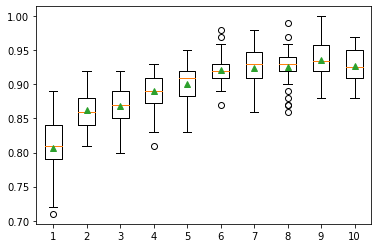

In [9]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i))
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Learning Rate

AdaBoost also supports a learning rate that controls the contribution of each model to the ensemble prediction.

This is controlled by the “learning_rate” argument and by default is set to 1.0 or full contribution. Smaller or larger values might be appropriate depending on the number of models used in the ensemble. There is a balance between the contribution of the models and the number of trees in the ensemble.

More trees may require a smaller learning rate; fewer trees may require a larger learning rate.

The example below explores learning rate values between 0.1 and 2.0 in 0.1 increments.

Result:
Running the example first reports the mean accuracy for each configured learning rate
We can see the general trend of decreasing model performance with a learning rate larger than 1.0 on this dataset.



>0.100 0.767 (0.049)
>0.200 0.786 (0.042)
>0.300 0.802 (0.040)
>0.400 0.798 (0.037)
>0.500 0.805 (0.042)
>0.600 0.795 (0.031)
>0.700 0.799 (0.035)
>0.800 0.801 (0.033)
>0.900 0.805 (0.032)
>1.000 0.806 (0.041)
>1.100 0.801 (0.037)
>1.200 0.800 (0.030)
>1.300 0.799 (0.041)
>1.400 0.793 (0.041)
>1.500 0.790 (0.040)
>1.600 0.775 (0.034)
>1.700 0.767 (0.054)
>1.800 0.768 (0.040)
>1.900 0.736 (0.047)
>2.000 0.682 (0.048)


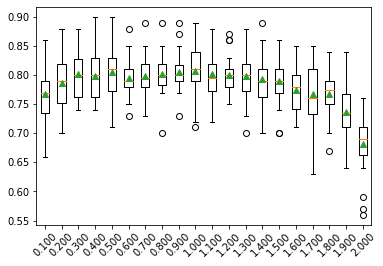

In [10]:
# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Explore Alternate Algorithm
The default algorithm used in the ensemble is a decision tree, although other algorithms can be used.The intent is to use very simple models, called weak learners. Also, the scikit-learn implementation requires that any models used must also support weighted samples, as they are how the ensemble is created by fitting models based on a weighted version of the training dataset.

The base model can be specified via the “base_estimator” argument. The base model must also support predicting probabilities or probability-like scores in the case of classification. If the specified model does not support a weighted training dataset.

Below example of a model that supports a weighted training is the logistic regression algorithm.

Running the example reports the mean and standard deviation accuracy of the model. We can see that AdaBoost ensemble with a logistic regression weak model achieves a classification accuracy of about 79 percent on this test dataset.

In [11]:
# evaluate adaboost algorithm with logistic regression weak learner for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.032)
